In [413]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
import seaborn as sn

In [414]:
df= pd.read_excel(r"TWTR.xlsx")

In [415]:
#Read the data and display the first 100 rows from the data
df.head(100)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0
1,2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0
...,...,...,...,...,...,...,...
95,2014-03-27,45.090000,46.400002,43.310001,46.320000,46.320000,15507597.0
96,2014-03-28,46.650002,47.340000,45.700001,47.299999,47.299999,9610491.0
97,2014-03-31,47.549999,47.750000,46.430000,46.669998,46.669998,5794497.0
98,2014-04-01,46.709999,47.590000,46.180000,46.980000,46.980000,6916147.0


In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2264 non-null   datetime64[ns]
 1   Open       2259 non-null   float64       
 2   High       2259 non-null   float64       
 3   Low        2259 non-null   float64       
 4   Close      2259 non-null   float64       
 5   Adj Close  2259 non-null   float64       
 6   Volume     2259 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 123.9 KB


In [417]:
#it will gives the total rows and columns
df.shape

(2264, 7)

In [418]:
#Give the column insights
'''
1. Total we have 7 columns.
2. only only few values are missing
3. All data are in decimal or numerical
4. Columns are describing the stock price values'''

'\n1. Total we have 7 columns.\n2. only only fe values are missing\n3. All data are in decimal or numerical\n4. Columns are describing the stock price values'

In [419]:
#Check whether this dataset contains any null values or not if it is there then remove the null values from it
#yes we have onlye few numm values

df.isnull().sum()

Date         0
Open         5
High         5
Low          5
Close        5
Adj Close    5
Volume       5
dtype: int64

In [420]:
#remove the null values 

df= df.copy().dropna()
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [421]:
#4) Find the statistical description of the data.
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2259,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2.259000e+03
mean,2018-05-04 20:18:48.286852608,36.020286,36.699881,35.339465,36.003625,36.003625,2.175186e+07
min,2013-11-07 00:00:00,13.950000,14.220000,13.725000,14.010000,14.010000,0.000000e+00
25%,2016-02-06 12:00:00,25.550000,26.215001,24.912501,25.410000,25.410000,1.233530e+07
50%,2018-05-04 00:00:00,35.419998,36.099998,34.820000,35.490002,35.490002,1.691305e+07
75%,2020-08-01 12:00:00,44.205000,45.015000,43.327501,44.135000,44.135000,2.428082e+07
max,2022-10-27 00:00:00,78.360001,80.750000,76.050003,77.629997,77.629997,2.692131e+08
std,NaN,14.118463,14.372057,13.828724,14.089989,14.089989,1.909988e+07


In [422]:
#Find the missing values in the data
#all the missing value handled:(removed the missing values)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2259 entries, 0 to 2258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2259 non-null   datetime64[ns]
 1   Open       2259 non-null   float64       
 2   High       2259 non-null   float64       
 3   Low        2259 non-null   float64       
 4   Close      2259 non-null   float64       
 5   Adj Close  2259 non-null   float64       
 6   Volume     2259 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 141.2 KB


In [423]:
#df.columns
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0
1,2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0


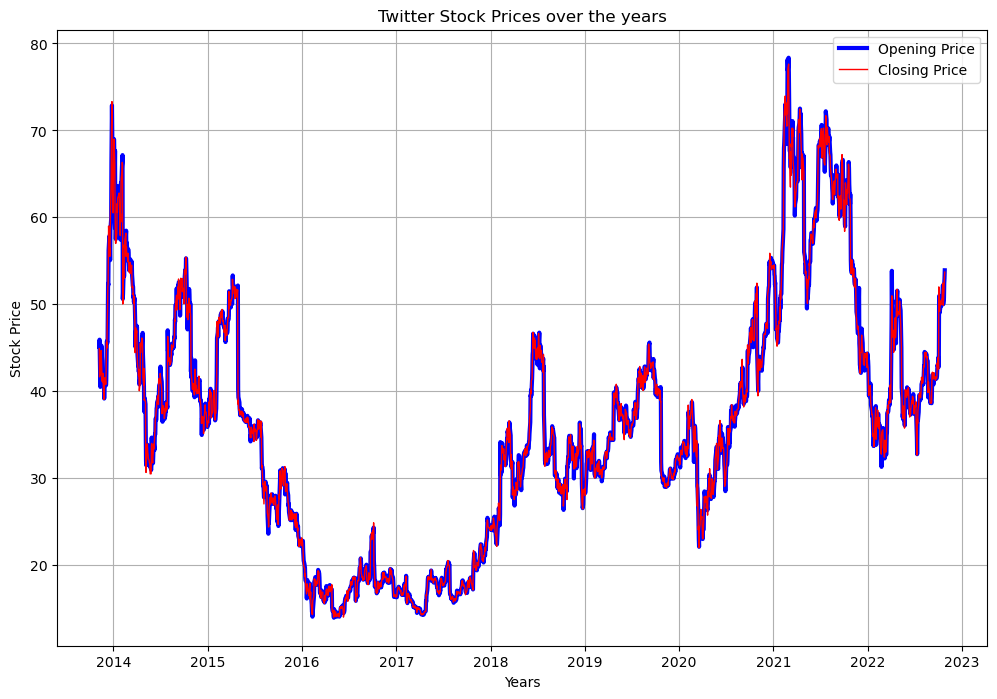

In [424]:
#Show the Twitter stock prices over the years and give a conclusion.
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

plt.figure(figsize=(12,8))
plt.plot(df.index, df['Open'], label="Opening Price",color="blue", linewidth=3)
plt.plot(df.index, df['Close'], label="Closing Price", color= "red",linewidth=1)

## Labels and Title
plt.xlabel('Years')
plt.ylabel('Stock Price')
plt.title("Twitter Stock Prices over the years")

# Grid and Legend
plt.legend()
plt.grid(True)
# Show the plot
plt.show()


In [425]:
'''
Conclusion:
Initial Surge & Volatility (2013-2014): Twitter's stock price initially surged after its IPO but faced significant volatility.

Stagnation & Decline (2015-2017): The stock price declined as Twitter struggled with growth and monetization concerns.

Recovery & Growth (2018-2021): There was a gradual recovery, especially as Twitter improved its business model and ad revenue.

Buyout & Delisting (2022): The stock saw a final surge before Elon Musk acquired Twitter for $44 billion in October 2022,
leading to its delisting.
'''

"\nConclusion:\nInitial Surge & Volatility (2013-2014): Twitter's stock price initially surged after its IPO but faced significant volatility.\n\nStagnation & Decline (2015-2017): The stock price declined as Twitter struggled with growth and monetization concerns.\n\nRecovery & Growth (2018-2021): There was a gradual recovery, especially as Twitter improved its business model and ad revenue.\n\nBuyout & Delisting (2022): The stock saw a final surge before Elon Musk acquired Twitter for $44 billion in October 2022,\nleading to its delisting.\n"

In [426]:
df.reset_index(inplace=True)


In [427]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

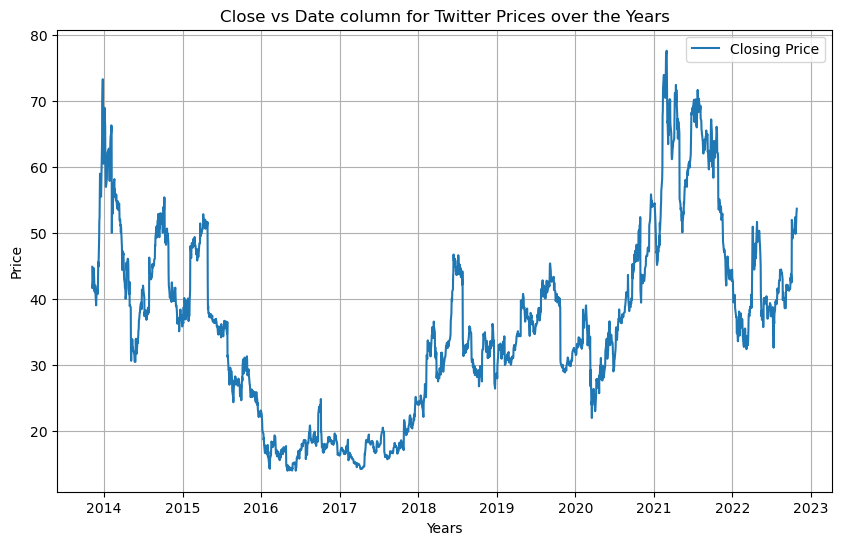

In [428]:
#2) Now compare the close vs date column for Twitter prices over the years.
df['date']= pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

plt.figure(figsize=(10,6))
plt.plot(df.index,df['Close'],label="Closing Price")
plt.xlabel("Years")
plt.ylabel("Price")
plt.title("Close vs Date column for Twitter Prices over the Years")
plt.grid(True)
plt.legend()
plt.show()

In [429]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'date'], dtype='object')

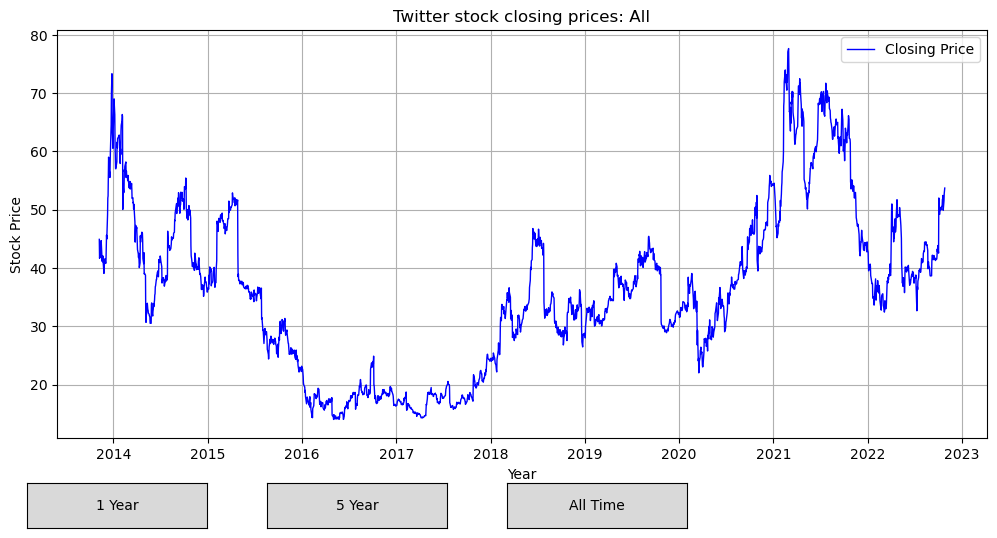

In [430]:
# Assign buttons to control time periods. Add the buttons to analyze the stock prices of Twitter in different time periods:

# Convert 'Date' to datetime and set as index

df['date']= pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

#Create the figure and axis
fig, ax= plt.subplots(figsize=(12,6)) #use ax to control everything inside the plot: title, labels, grid, etc.
plt.subplots_adjust(bottom=0.2)

#Function to update plot based on time period
def update_plot(period):
    ax.clear()  # Clear the previous plot
    if period == "1Y":
        filtered_df= df[df.index >= df.index.max() - pd.DateOffset(years=1)]
    elif period == "5Y":
        filtered_df = df[df.index >= df.index.max() - pd.DateOffset(years=5)]
    else:
        filtered_df = df
    #Plot 
    ax.plot(filtered_df.index, filtered_df["Close"], label="Closing Price", color="blue", linewidth=1)
    ax.set_xlabel("Year")
    ax.set_ylabel("Stock Price")
    ax.set_title(f"Twitter stock closing prices: {period}")
    ax.legend()
    ax.grid(True)
    plt.draw()

    

# Show initial plot
update_plot("All")

#Define button positions
ax_1Y = plt.axes([0.1, 0.05, 0.15, 0.075])
ax_5Y = plt.axes([0.3, 0.05, 0.15, 0.075])
ax_All = plt.axes([0.5, 0.05, 0.15, 0.075])

#Create buttons
btn_1Y = Button(ax_1Y, "1 Year")
btn_5y = Button(ax_5Y, "5 Year")
btn_All = Button(ax_All, "All Time")

# Connect button click to function
btn_1Y.on_clicked(lambda event : update_plot("1Y"))
btn_5y.on_clicked(lambda event : update_plot("5Y"))
btn_All.on_clicked(lambda event : update_plot("All"))


#Show the plot
plt.show()


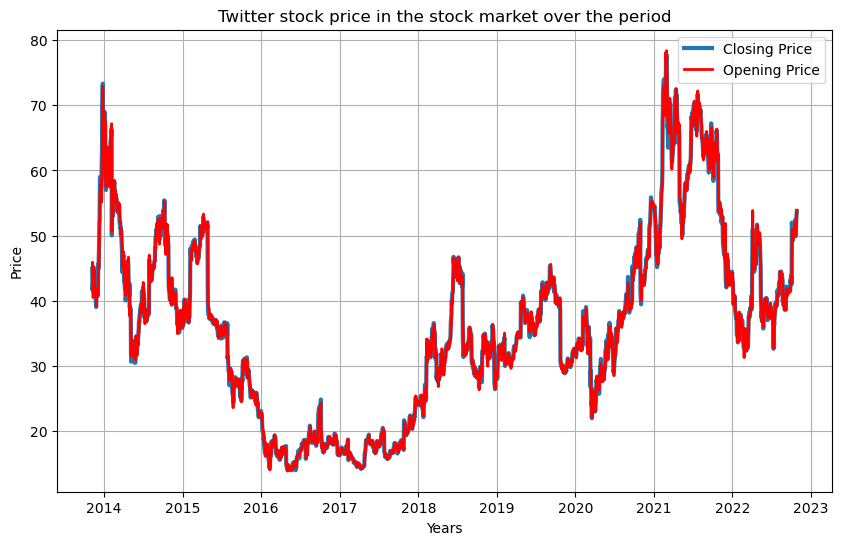

In [431]:
# Give the complete timeline of Twitter in the stock market. (Line Graph)

#Run this command : print(df.index)
#if the result will be DatetimeIndex(['2013-11-07', '2013-11-08', '2013-11-11', '2013-11-12',
 #              '2013-11-13', '2013-11-14', '2013-11-15', '2013-11-18',
 #              '2013-11-19', '2013-11-20',: That tells us whether the date is already the index or it was dropped.
#so no need below commands
#df['date']= pd.to_datetime(df['date'])
#df.set_index('date',inplace= True)

plt.figure(figsize=(10,6))
plt.plot(df.index, df['Close'],label="Closing Price", linewidth=3)
plt.plot(df.index, df['Open'], label="Opening Price", color= "red", linewidth=2)

plt.xlabel("Years")
plt.ylabel("Price")
plt.title("Twitter stock price in the stock market over the period")
plt.grid(True)
plt.legend()
plt.show()

In [432]:
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [433]:
print(df.index)

DatetimeIndex(['2013-11-07', '2013-11-08', '2013-11-11', '2013-11-12',
               '2013-11-13', '2013-11-14', '2013-11-15', '2013-11-18',
               '2013-11-19', '2013-11-20',
               ...
               '2022-10-14', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21', '2022-10-24', '2022-10-25',
               '2022-10-26', '2022-10-27'],
              dtype='datetime64[ns]', name='date', length=2259, freq=None)


In [434]:
#Give the insights for the above analysis and make a word cloud for that analysis.

print("Insights:")
print("1. Twitter went public in 2013, attracting strong early investor interest")
print("2. Stock prices fluctuated due to product changes, leadership shifts, and acquisition rumors.")
print("3. Major price drops occurred during user growth slowdowns and revenue challenges.")
print("4. Twitter was eventually delisted after the acquisition, ending its public trading journey.")

Insights:
1. Twitter went public in 2013, attracting strong early investor interest
2. Stock prices fluctuated due to product changes, leadership shifts, and acquisition rumors.
3. Major price drops occurred during user growth slowdowns and revenue challenges.
4. Twitter was eventually delisted after the acquisition, ending its public trading journey.


In [435]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

C:\Users\Lokesh\AppData\Local\Temp\ipykernel_22180\3147576290.py:47: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.



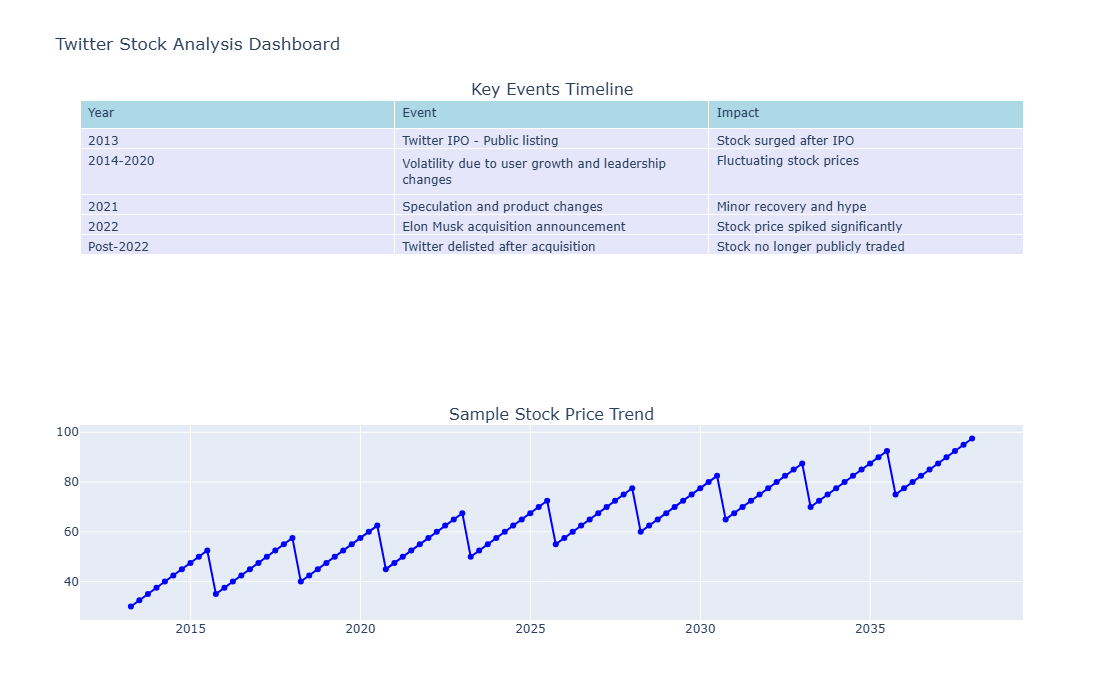

In [436]:
#Create a Dashboard from the above statements by using power BI or Tableau or Python and present it to the Client.

# 1. Timeline insights
insights_data = {
    "Year": ["2013", "2014-2020", "2021", "2022", "Post-2022"],
    "Event": [
        "Twitter IPO - Public listing",
        "Volatility due to user growth and leadership changes",
        "Speculation and product changes",
        "Elon Musk acquisition announcement",
        "Twitter delisted after acquisition"
    ],
    "Impact": [
        "Stock surged after IPO",
        "Fluctuating stock prices",
        "Minor recovery and hype",
        "Stock price spiked significantly",
        "Stock no longer publicly traded"
    ]
}

# Convert to DataFrame
insights_df = pd.DataFrame(insights_data)

# 2. Create subplots layout
fig = make_subplots(
    rows=2, cols=1,
    row_heights=[0.5, 0.5],
    specs=[[{"type": "table"}], [{"type": "scatter"}]],
    subplot_titles=("Key Events Timeline", "Sample Stock Price Trend")
)

# 3. Add timeline table
fig.add_trace(
    go.Table(
        header=dict(values=["Year", "Event", "Impact"],
                    fill_color='lightblue',
                    align='left'),
        cells=dict(values=[insights_df[col] for col in insights_df.columns],
                   fill_color='lavender',
                   align='left')
    ),
    row=1, col=1
)

# 4. Add a simulated stock price trend
dates = pd.date_range(start="2013-01-01", periods=100, freq="Q")
price = [30 + (i % 10) * 2 + (i * 0.5) for i in range(len(dates))]

fig.add_trace(
    go.Scatter(x=dates, y=price, mode='lines+markers', name='Closing Price',
               line=dict(color='blue')),
    row=2, col=1
)

# 5. Show the dashboard
fig.update_layout(height=700, width=1000, title_text="Twitter Stock Analysis Dashboard")
fig.show()

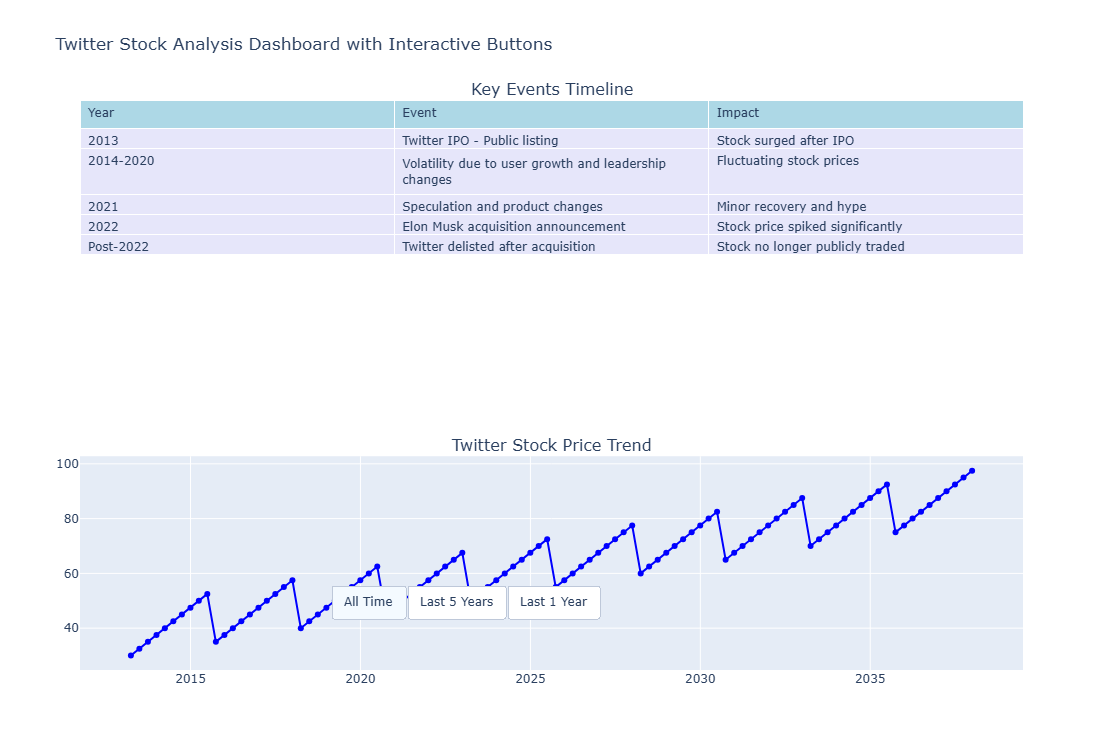

In [437]:
#Create a Dashboard from the above statements by using power BI or Tableau or Python and present it to the Client with button.


import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Simulate stock data
dates = pd.date_range(start="2013-01-01", periods=100, freq="QE")
prices = [30 + (i % 10) * 2 + (i * 0.5) for i in range(len(dates))]
df = pd.DataFrame({"Date": dates, "Close": prices})

# Timeline events
insights_data = {
    "Year": ["2013", "2014-2020", "2021", "2022", "Post-2022"],
    "Event": [
        "Twitter IPO - Public listing",
        "Volatility due to user growth and leadership changes",
        "Speculation and product changes",
        "Elon Musk acquisition announcement",
        "Twitter delisted after acquisition"
    ],
    "Impact": [
        "Stock surged after IPO",
        "Fluctuating stock prices",
        "Minor recovery and hype",
        "Stock price spiked significantly",
        "Stock no longer publicly traded"
    ]
}
timeline_df = pd.DataFrame(insights_data)

# Create figure with table and line chart
fig = make_subplots(
    rows=2, cols=1,
    specs=[[{"type": "table"}], [{"type": "xy"}]],
    subplot_titles=("Key Events Timeline", "Twitter Stock Price Trend")
)

# Add timeline table
fig.add_trace(
    go.Table(
        header=dict(values=list(timeline_df.columns), fill_color='lightblue', align='left'),
        cells=dict(values=[timeline_df[col] for col in timeline_df.columns], fill_color='lavender', align='left')
    ),
    row=1, col=1
)

# Create traces for different periods
all_trace = go.Scatter(x=df["Date"], y=df["Close"], mode='lines+markers', name="All Time", line=dict(color='blue'))
df_1Y = df[df["Date"] >= df["Date"].max() - pd.DateOffset(years=1)]
trace_1Y = go.Scatter(x=df_1Y["Date"], y=df_1Y["Close"], mode='lines+markers', name="Last 1 Year", line=dict(color='green'))

df_5Y = df[df["Date"] >= df["Date"].max() - pd.DateOffset(years=5)]
trace_5Y = go.Scatter(x=df_5Y["Date"], y=df_5Y["Close"], mode='lines+markers', name="Last 5 Years", line=dict(color='red'))

# Add all time trace as default
fig.add_trace(all_trace, row=2, col=1)

# Add buttons
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            x=0.55,
            y=0.15,
            showactive=True,
            buttons=list([
                dict(label="All Time",
                     method="update",
                     args=[{"x": [df["Date"]], "y": [df["Close"]],
                            "type": "scatter", "mode": "lines+markers"}]),
                dict(label="Last 5 Years",
                     method="update",
                     args=[{"x": [df_5Y["Date"]], "y": [df_5Y["Close"]],
                            "type": "scatter", "mode": "lines+markers"}]),
                dict(label="Last 1 Year",
                     method="update",
                     args=[{"x": [df_1Y["Date"]], "y": [df_1Y["Close"]],
                            "type": "scatter", "mode": "lines+markers"}]),
            ]),
        )
    ]
)

# Final layout tweaks
fig.update_layout(height=750, width=1000, title_text="Twitter Stock Analysis Dashboard with Interactive Buttons")
fig.show()